In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
csv_file_path='data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


## 7-2. 결측치(Missing Data)

In [3]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [4]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [5]:
trade.isnull().sum()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [6]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [7]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [8]:
trade.isnull().any(axis=0)

기간      False
국가명     False
수출건수     True
수출금액     True
수입건수     True
수입금액     True
무역수지     True
dtype: bool

In [9]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [10]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

In [11]:
print(trade.isnull().sum())
print(trade.any(axis=1))

기간      0
국가명     0
수출건수    0
수출금액    1
수입건수    0
수입금액    0
무역수지    1
dtype: int64
0      True
1      True
2      True
3      True
4      True
       ... 
191    True
192    True
193    True
194    True
195    True
Length: 196, dtype: bool


In [12]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


In [13]:
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [14]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [15]:
trade.loc[191, '무역수지'] = (trade.loc[188, '무역수지'] + trade.loc[194, '무역수지'] )/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5


In [16]:
trade.loc[191, '무역수지'] = np.NaN
trade[trade.isnull().any(axis=1)]
trade[trade['국가명']=='미국'] = trade[trade['국가명']=='미국'].fillna(method='ffill')

print(trade.loc[191, '무역수지'])
trade.loc[191, '무역수지'] = np.NaN
trade[trade['국가명']=='미국'] = trade[trade['국가명']=='미국'].fillna(method='bfill')
print(trade.loc[191, '무역수지'])

1904500.0
313853.0


## 7-3. 중복된 데이터

In [52]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [53]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [54]:
trade.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [55]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [58]:
df.drop_duplicates(subset='id',keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


## 7-4. 이상치(Outlier)

### Z-score Method
  이상치인 데이터의 인덱스를 리턴하는 outlier라는 함수  
  데이터프레임 df, 컬럼 col, 기준 z를 인풋.

- abs(df[col] - np.mean(df[col])) : 데이터에서 평균을 빼준 것에 절대값을 취합니다.
- abs(df[col] - np.mean(df[col]))/np.std(df[col]) : 위에서 얻은 값을 표준편차로 나눠줍니다.
- df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index: 값이 z보다 큰 데이터의 인덱스를 추출합니다

In [59]:
def outlier_zscore(df,col,z):
        return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [61]:
trade.loc[outlier_zscore(trade,'무역수지',1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [64]:
trade.loc[outlier_zscore(trade,'무역수지',2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [65]:
def not_outlier_zscore(df,col,z):
        return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])<z].index

### IQR Method

In [66]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

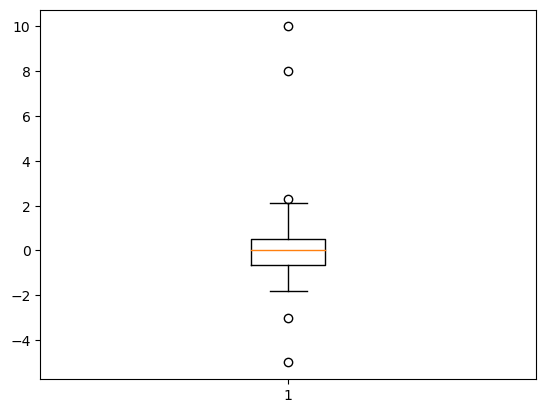

In [67]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

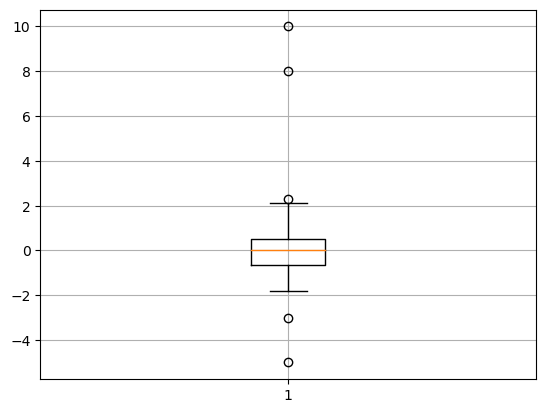

In [85]:
plt.figure()
plt.subplot(111)
plt.boxplot(data)
plt.grid()
plt.show()

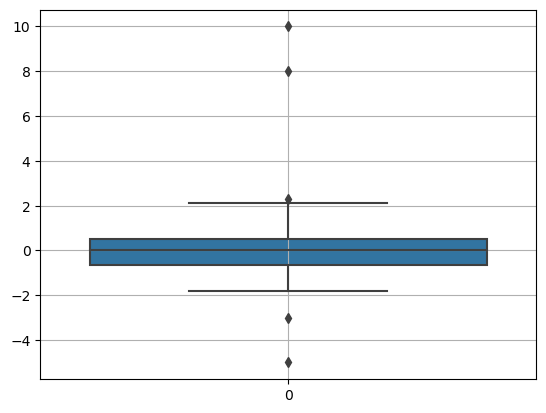

In [84]:
import seaborn as sns
plt.figure()
sns.boxplot(data=data,dodge=False)
plt.grid()
plt.show()

In [86]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [87]:
data[((Q1-1.5*IQR) > data) | ((Q3+1.5*IQR) < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [88]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [89]:

def get_outlier(data: pd.Series, weight: float = 1.5):
    """get index of outlier by IQR method"""

    q_25 = data.quantile(q=0.25)
    q_75 = data.quantile(q=0.75)
    iqr_weight = (q_75 - q_25) * weight

    bound_l = q_25 - iqr_weight
    bound_u = q_75 + iqr_weight

    outlier_idx = data[(data < bound_l) | (data > bound_u)].index
    return outlier_idx


def drop_outlier_series(data: pd.Series, weight: float = 1.5, reset_idx: bool = True):
    """drop data by IQR method"""

    outlier_idx = get_outlier(data=data, weight=weight)
    data.drop(labels=outlier_idx, inplace=True)
    
    if reset_idx:
        data.reset_index(drop=True, inplace=True)
    else: ...

    return data

In [106]:
def outlier2(df,col):
    q_25 = df[col].quantile(q=0.25)
    q_75 = df[col].quantile(q=0.75)
    
    IQR = q_75 - q_25
    
    l_bound = q_25 - (1.0 * IQR)
    h_bound = q_75 + (1.0 * IQR)9
    
    return df[(df[col] < l_bound) | (df[col] > h_bound)].index

In [108]:
ret_val = outlier2(trade,'무역수지')

In [109]:
trade.loc[ret_val]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [99]:
def get_outlier(data: pd.Series, weight: float = 1.5):
    """get index of outlier by IQR method"""

    q_25 = data.quantile(q=0.25)
    q_75 = data.quantile(q=0.75)
    iqr_weight = (q_75 - q_25) * weight

    bound_l = q_25 - iqr_weight
    bound_u = q_75 + iqr_weight

    outlier_idx = data[(data < bound_l) | (data > bound_u)].index
    return outlier_idx

In [101]:
get_outlier(trade['무역수지'])

Int64Index([], dtype='int64')

In [110]:
df=trade.copy()

In [111]:
col='무역수지'

In [112]:
    q_25 = df[col].quantile(q=0.25)
    q_75 = df[col].quantile(q=0.75)

In [113]:
q_25

-1620432.0

In [114]:
q_75

2745131.0

In [115]:
IQR = q_75 - q_25


In [116]:
IQR

4365563.0

In [117]:
l_bound = q_25 - (1.0 * IQR)
h_bound = q_75 + (1.0 * IQR)

In [119]:
df[(df[col] < l_bound) | (df[col] > h_bound)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


## 7-5. 정규화(Normalization)

### Standardization
- 데이터의 평균은 0, 분산은 1로 변환합니다.
- Standardization은 보통 평균이 0이고 표준편차가 1일 때 사용합니다. 
- 그렇기에 데이터가 가우시안 분포(정규분포)를 따를 경우 유용합니다.
- Z-Score 계산법과 동일 

### Min-Max Scaling
- 데이터의 최솟값은 0, 최댓값은 1로 변환합니다.
- Min-Max Scaling은 피처의 범위가 다를 때 주로 사용하며 확률 분포를 모를 때 유용합니다.
- Outlier 에 덜 민감

In [120]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


#### Standardization Ex

<AxesSubplot:ylabel='Frequency'>

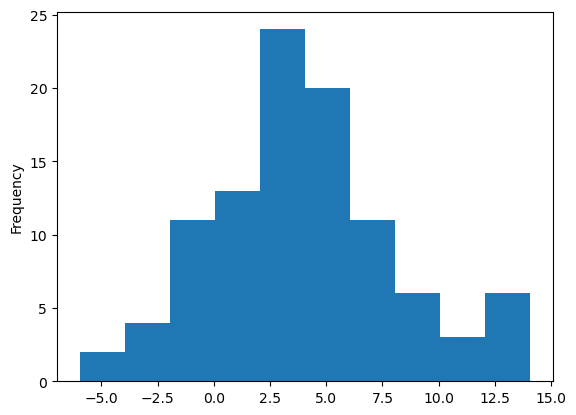

In [125]:
x['A'].plot(kind='hist')

<AxesSubplot:>

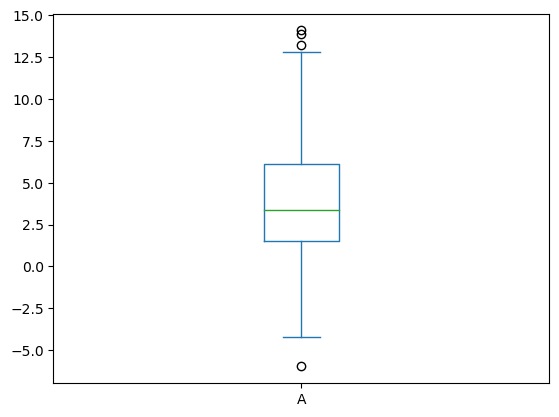

In [133]:
x['A'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

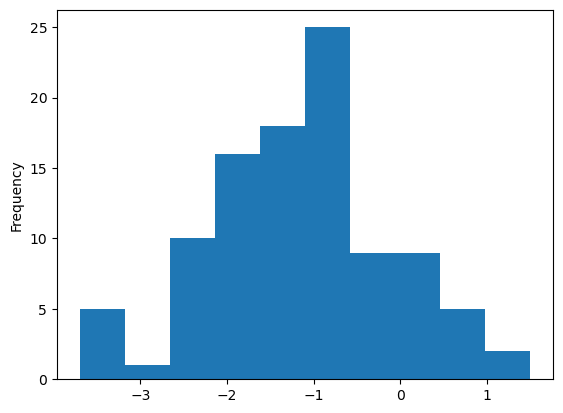

In [126]:
x['B'].plot(kind='hist')

<AxesSubplot:>

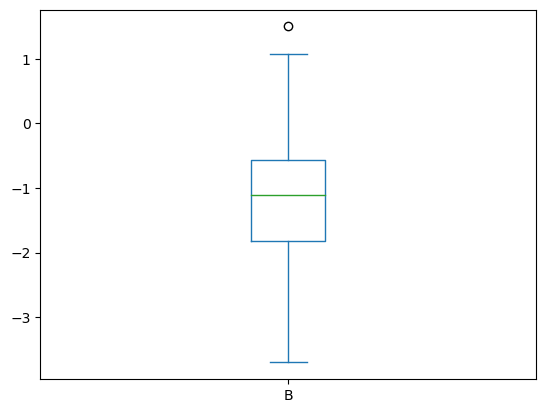

In [134]:
x['B'].plot(kind='box')

In [121]:
x_standardization = (x - x.mean()) / x.std()
x_standardization

,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


<AxesSubplot:xlabel='A', ylabel='Count'>

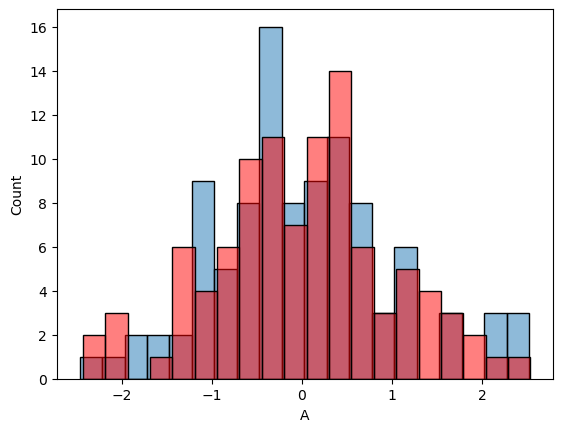

In [136]:
sns.histplot(x_standardization['A'],alpha=0.5,bins=20)
sns.histplot(x_standardization['B'],color='red',alpha=0.5,bins=20)

#### min-max scaling ex

In [137]:
x_min_max = (x-x.min()) / (x.max()-x.min())

In [138]:
x_min_max

,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


<AxesSubplot:ylabel='Count'>

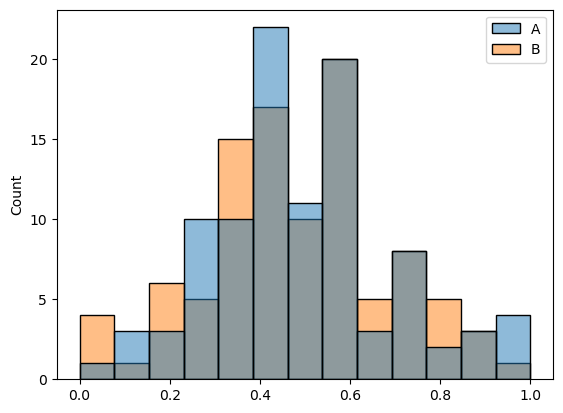

In [140]:
sns.histplot(x_min_max)

<AxesSubplot:xlabel='A'>

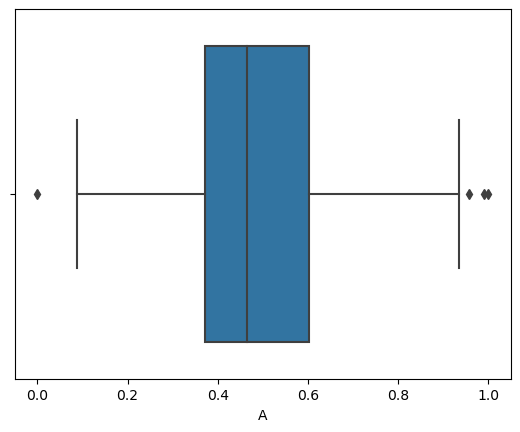

In [142]:
sns.boxplot(x_min_max['A'])

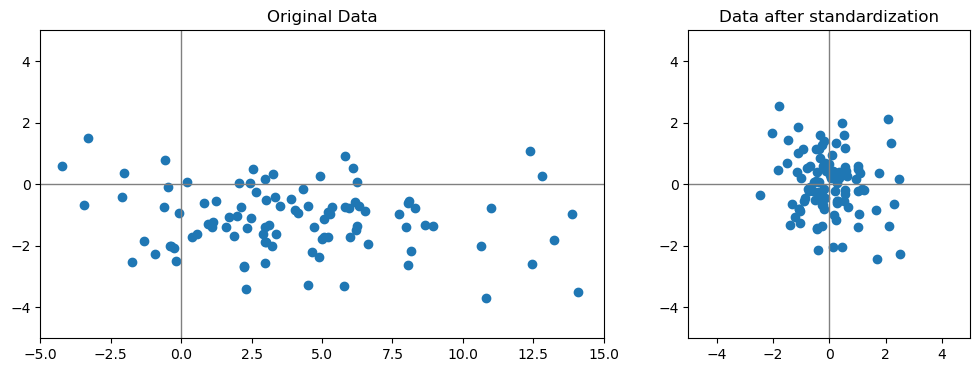

In [143]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

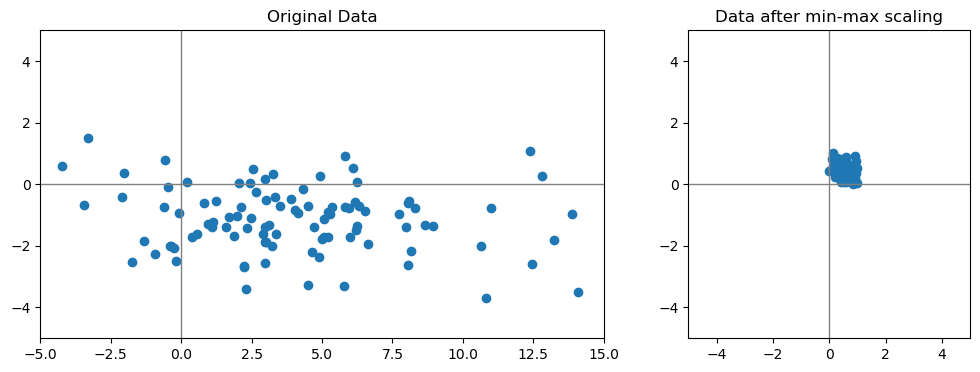

In [144]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

#### Standarization - Trade

In [145]:
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,313853.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [146]:
trade.columns

Index(['기간', '국가명', '수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], dtype='object')

In [147]:
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']

In [150]:
x = trade[cols]

In [151]:
x_standarization = (x-x.mean())/x.std()

In [153]:
x_standarization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,5.921189e-17,6.091993e-17,-8.312439e-17,-7.401487e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.602120e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.115226e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.439519e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.473040e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434888e+00


#### Min-Max Scaling - Trade

In [154]:
x

,수출건수,수출금액,수입건수,수입금액,무역수지
0,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...
191,105360.0,5946782.0,1141118.0,5038739.0,313853.0
192,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [155]:
x_minmax = (x - x.min())/ (x.max() - x.min())

In [156]:
x_minmax

,수출건수,수출금액,수입건수,수입금액,무역수지
0,0.142372,0.794728,0.197014,0.700903,0.708320
1,0.035939,0.295728,0.332972,0.085394,0.496512
2,0.011187,0.042477,0.001249,0.112938,0.125310
3,0.078351,0.629759,0.099597,0.542551,0.603281
4,0.024131,0.254394,0.270146,0.000000,0.505660
...,...,...,...,...,...
191,0.118243,0.325201,0.823509,0.277977,0.325028
192,0.178207,0.022433,0.046863,0.135050,0.080469
193,0.284970,0.692373,0.208265,0.816241,0.477453
194,0.162527,0.222220,0.835972,0.175552,0.325028


In [160]:
x_minmax.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.396858
std,0.156108,0.302099,0.235988,0.273790,0.247708
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


---

In [161]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])

In [162]:
# Q. train 데이터와 test 데이터에 정규화를 적용해봅시다.
train_min = train.min()
train_max = train.max()

test_min = test.min()
test_max = test.max()

# 중요한 점은, test 데이터에 min-max scaling을 적용할 때도
# train 데이터 기준으로 수행해야 한다는 것입니다.
train_min_max = (train - train_min )/ (train_max - train_min)
test_min_max = (test - train_min) / (train_max - train_min)

In [163]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [164]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


#### scikit-learn의 StandardScaler, MinMaxScaler를 사용하는 방법도 있습니다.


In [165]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [166]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [167]:
scaler.transform(test)

array([[-0.25,  0.55]])

## 7-6. 원-핫 인코딩(One-Hot Encoding)

In [168]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [169]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


In [170]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


## 7-7. 구간화(Binning)

In [172]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

<AxesSubplot:>

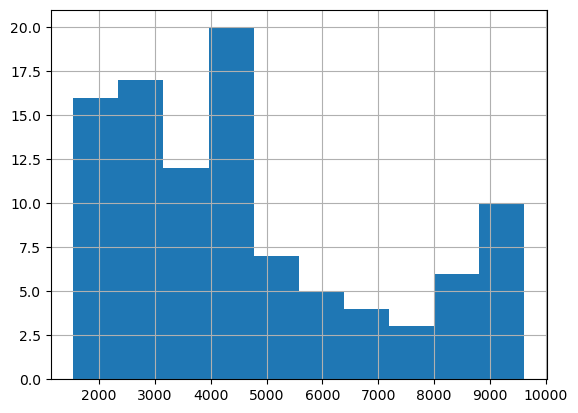

In [173]:
salary.hist()

In [174]:
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [175]:
ctg = pd.cut(salary, bins=bins)

In [176]:
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [177]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [178]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [179]:
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [180]:
ctg.value_counts()

(2000, 4000]     34
(4000, 6000]     29
(8000, 10000]    16
(0, 2000]        12
(6000, 8000]      9
dtype: int64

In [182]:
trade[trade.isnull().any(axis=1)]

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
